## Training models 

In [1]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

from crowd_nav.imitate import *

### Contrastive

In [23]:
args_contrast = \
{'policy' : 'sail', 'data_sample' : 0.7, 'batch_size' : 128, 'contrast_sampling' : 'event',
'auxiliary_task' : 'contrastive', 'gpu' : True, 'contrast_weight' : 2.0, 
'output_dir' : 'data/finaltests/contrastive/imitate', 'num_epoch' : 200}

In [24]:
_ = imitate(args_change=args_contrast)

Folder already exists, continuing from last saved model
Path : data/finaltests/contrastive/imitate-event-data-0.5-weight-2.0-horizon-4-temperature-0.20-nboundary-0-notraj
2020-12-30 17:16:08, INFO:  =========================== 
2020-12-30 17:16:09, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 17:16:09, INFO: Using device: cuda
2020-12-30 17:16:09, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 17:16:09, INFO: +: 0 - 102427
2020-12-30 17:16:09, INFO: val_indices: 204856 - 292650
2020-12-30 17:16:09, INFO: Auxiliary task contrastive


Epoch #0: loss = (1.0702, 0.4469), task = (0.0780, 0.0644), nce = (0.4961, 0.1912), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.3931, 0.3813), task = (0.0612, 0.0606), nce = (0.1660, 0.1604), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.3351, 0.3344), task = (0.0583, 0.0584), nce = (0.1384, 0.1380), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.3021, 0.3055), task = (0.0568, 0.0565), nce = (0.1227, 0.1245), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.2841, 0.2970), task = (0.0554, 0.0561), nce = (0.1144, 0.1204), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.2729, 0.2996), task = (0.0546, 0.0566), nce = (0.1091, 0.1215), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.2661, 0.2821), task = (0.0539, 0.0547), nce = (0.1061, 0.1137), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.2612, 0.2825), task = (0.0534, 0.0546), nce = (0.1039, 0.1139), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.2569, 0.2991), task = (0.0529, 0.0551), nce = (0.1020, 0.1220), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.2553, 0.2731), task = (0.0525, 0.0537), nce = (0.1014, 0.1097), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.2522, 0.2671), task = (0.0522, 0.0540), nce = (0.1000, 0.1066), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.2487, 0.2692), task = (0.0518, 0.0548), nce = (0.0985, 0.1072), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.2488, 0.2681), task = (0.0516, 0.0538), nce = (0.0986, 0.1072), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.2460, 0.2692), task = (0.0514, 0.0535), nce = (0.0973, 0.1079), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.2427, 0.2600), task = (0.0510, 0.0528), nce = (0.0959, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.2414, 0.2745), task = (0.0508, 0.0540), nce = (0.0953, 0.1102), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.2398, 0.2595), task = (0.0507, 0.0525), nce = (0.0946, 0.1035), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.2397, 0.2664), task = (0.0507, 0.0526), nce = (0.0945, 0.1069), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.2367, 0.2612), task = (0.0503, 0.0526), nce = (0.0932, 0.1043), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.2349, 0.2596), task = (0.0498, 0.0524), nce = (0.0926, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.2350, 0.2602), task = (0.0499, 0.0520), nce = (0.0925, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.2332, 0.2512), task = (0.0496, 0.0509), nce = (0.0918, 0.1002), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.2317, 0.2576), task = (0.0494, 0.0518), nce = (0.0912, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.2314, 0.2606), task = (0.0493, 0.0517), nce = (0.0911, 0.1044), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.2302, 0.2581), task = (0.0490, 0.0523), nce = (0.0906, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.2294, 0.2523), task = (0.0490, 0.0520), nce = (0.0902, 0.1001), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.2297, 0.2539), task = (0.0489, 0.0515), nce = (0.0904, 0.1012), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.2281, 0.2638), task = (0.0487, 0.0524), nce = (0.0897, 0.1057), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.2271, 0.2578), task = (0.0486, 0.0515), nce = (0.0893, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.2276, 0.2575), task = (0.0485, 0.0517), nce = (0.0896, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.2267, 0.2603), task = (0.0484, 0.0525), nce = (0.0892, 0.1039), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.2257, 0.2543), task = (0.0483, 0.0513), nce = (0.0887, 0.1015), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.2248, 0.2527), task = (0.0481, 0.0516), nce = (0.0884, 0.1006), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.2241, 0.2564), task = (0.0479, 0.0515), nce = (0.0881, 0.1024), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.2244, 0.2519), task = (0.0478, 0.0508), nce = (0.0883, 0.1005), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.2238, 0.2490), task = (0.0478, 0.0511), nce = (0.0880, 0.0989), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.2224, 0.2539), task = (0.0475, 0.0512), nce = (0.0874, 0.1014), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.2229, 0.2588), task = (0.0477, 0.0511), nce = (0.0876, 0.1038), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.2216, 0.2597), task = (0.0474, 0.0510), nce = (0.0871, 0.1044), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.2218, 0.2498), task = (0.0474, 0.0507), nce = (0.0872, 0.0996), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.2212, 0.2559), task = (0.0473, 0.0506), nce = (0.0869, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.2203, 0.2518), task = (0.0472, 0.0514), nce = (0.0865, 0.1002), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.2197, 0.2530), task = (0.0470, 0.0510), nce = (0.0863, 0.1010), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.2199, 0.2612), task = (0.0470, 0.0511), nce = (0.0864, 0.1050), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.2205, 0.2538), task = (0.0470, 0.0507), nce = (0.0867, 0.1016), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.2197, 0.2523), task = (0.0468, 0.0507), nce = (0.0865, 0.1008), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.2181, 0.2564), task = (0.0466, 0.0526), nce = (0.0858, 0.1019), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.2180, 0.2528), task = (0.0467, 0.0511), nce = (0.0857, 0.1009), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.2188, 0.2513), task = (0.0465, 0.0506), nce = (0.0862, 0.1003), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.2168, 0.2571), task = (0.0464, 0.0512), nce = (0.0852, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.2168, 0.2642), task = (0.0465, 0.0512), nce = (0.0851, 0.1065), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.2169, 0.2500), task = (0.0463, 0.0509), nce = (0.0853, 0.0995), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.2160, 0.2559), task = (0.0461, 0.0510), nce = (0.0850, 0.1024), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.2158, 0.2546), task = (0.0460, 0.0519), nce = (0.0849, 0.1014), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.2160, 0.2643), task = (0.0460, 0.0519), nce = (0.0850, 0.1062), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.2161, 0.2586), task = (0.0461, 0.0510), nce = (0.0850, 0.1038), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.2146, 0.2509), task = (0.0457, 0.0498), nce = (0.0844, 0.1006), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.2153, 0.2521), task = (0.0457, 0.0510), nce = (0.0848, 0.1005), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.2150, 0.2530), task = (0.0458, 0.0508), nce = (0.0846, 0.1011), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.2142, 0.2522), task = (0.0456, 0.0507), nce = (0.0843, 0.1007), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.2134, 0.2526), task = (0.0455, 0.0503), nce = (0.0839, 0.1011), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.2140, 0.2531), task = (0.0455, 0.0505), nce = (0.0842, 0.1013), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.2143, 0.2570), task = (0.0456, 0.0508), nce = (0.0843, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.2140, 0.2525), task = (0.0454, 0.0507), nce = (0.0843, 0.1009), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.2127, 0.2513), task = (0.0453, 0.0501), nce = (0.0837, 0.1006), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.2129, 0.2591), task = (0.0452, 0.0517), nce = (0.0838, 0.1037), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.2139, 0.2528), task = (0.0454, 0.0507), nce = (0.0842, 0.1010), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.2115, 0.2548), task = (0.0449, 0.0518), nce = (0.0833, 0.1015), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.2123, 0.2550), task = (0.0450, 0.0514), nce = (0.0837, 0.1018), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.2120, 0.2555), task = (0.0450, 0.0509), nce = (0.0835, 0.1023), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.2122, 0.2523), task = (0.0449, 0.0512), nce = (0.0836, 0.1005), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.2115, 0.2522), task = (0.0449, 0.0512), nce = (0.0833, 0.1005), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.2119, 0.2554), task = (0.0448, 0.0504), nce = (0.0836, 0.1025), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.2112, 0.2571), task = (0.0448, 0.0512), nce = (0.0832, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.2111, 0.2522), task = (0.0447, 0.0504), nce = (0.0832, 0.1009), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.2118, 0.2551), task = (0.0448, 0.0514), nce = (0.0835, 0.1018), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.2103, 0.2542), task = (0.0445, 0.0522), nce = (0.0829, 0.1010), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.2109, 0.2569), task = (0.0445, 0.0507), nce = (0.0832, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.2103, 0.2570), task = (0.0445, 0.0510), nce = (0.0829, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.2091, 0.2591), task = (0.0442, 0.0508), nce = (0.0825, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.2096, 0.2536), task = (0.0441, 0.0510), nce = (0.0827, 0.1013), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.2102, 0.2544), task = (0.0443, 0.0509), nce = (0.0830, 0.1018), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.2103, 0.2551), task = (0.0442, 0.0510), nce = (0.0830, 0.1021), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.2094, 0.2575), task = (0.0442, 0.0511), nce = (0.0826, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.2094, 0.2575), task = (0.0441, 0.0510), nce = (0.0826, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.2088, 0.2531), task = (0.0441, 0.0503), nce = (0.0823, 0.1014), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.2082, 0.2535), task = (0.0439, 0.0503), nce = (0.0821, 0.1016), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.2088, 0.2552), task = (0.0440, 0.0510), nce = (0.0824, 0.1021), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.2081, 0.2566), task = (0.0439, 0.0515), nce = (0.0821, 0.1025), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.2084, 0.2553), task = (0.0440, 0.0511), nce = (0.0822, 0.1021), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.2081, 0.2591), task = (0.0439, 0.0527), nce = (0.0821, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.2081, 0.2602), task = (0.0438, 0.0513), nce = (0.0821, 0.1044), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.2076, 0.2569), task = (0.0437, 0.0512), nce = (0.0819, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.2079, 0.2607), task = (0.0437, 0.0524), nce = (0.0821, 0.1042), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.2066, 0.2558), task = (0.0436, 0.0513), nce = (0.0815, 0.1023), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.2067, 0.2559), task = (0.0437, 0.0510), nce = (0.0815, 0.1024), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.2062, 0.2552), task = (0.0434, 0.0509), nce = (0.0814, 0.1022), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.2069, 0.2539), task = (0.0436, 0.0509), nce = (0.0816, 0.1015), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.2062, 0.2563), task = (0.0434, 0.0511), nce = (0.0814, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.2063, 0.2566), task = (0.0433, 0.0509), nce = (0.0815, 0.1028), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.2064, 0.2561), task = (0.0433, 0.0515), nce = (0.0815, 0.1023), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.2077, 0.2542), task = (0.0435, 0.0508), nce = (0.0821, 0.1017), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.2055, 0.2579), task = (0.0431, 0.0515), nce = (0.0812, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.2057, 0.2555), task = (0.0433, 0.0510), nce = (0.0812, 0.1023), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.2064, 0.2563), task = (0.0433, 0.0508), nce = (0.0815, 0.1027), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.2059, 0.2556), task = (0.0433, 0.0512), nce = (0.0813, 0.1022), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.2061, 0.2563), task = (0.0433, 0.0511), nce = (0.0814, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.2058, 0.2601), task = (0.0431, 0.0510), nce = (0.0814, 0.1046), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.2047, 0.2598), task = (0.0430, 0.0517), nce = (0.0809, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.2053, 0.2589), task = (0.0430, 0.0531), nce = (0.0811, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.2065, 0.2566), task = (0.0433, 0.0523), nce = (0.0816, 0.1021), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.2047, 0.2549), task = (0.0428, 0.0507), nce = (0.0810, 0.1021), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.2047, 0.2574), task = (0.0429, 0.0511), nce = (0.0809, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.2049, 0.2580), task = (0.0429, 0.0526), nce = (0.0810, 0.1027), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.2040, 0.2600), task = (0.0427, 0.0518), nce = (0.0807, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.2056, 0.2584), task = (0.0429, 0.0520), nce = (0.0814, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.2046, 0.2573), task = (0.0428, 0.0516), nce = (0.0809, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.2042, 0.2584), task = (0.0426, 0.0512), nce = (0.0808, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.2038, 0.2589), task = (0.0426, 0.0514), nce = (0.0806, 0.1038), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.2045, 0.2617), task = (0.0427, 0.0518), nce = (0.0809, 0.1049), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.2032, 0.2575), task = (0.0426, 0.0514), nce = (0.0803, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.2041, 0.2579), task = (0.0426, 0.0511), nce = (0.0808, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.2035, 0.2573), task = (0.0425, 0.0516), nce = (0.0805, 0.1028), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.2037, 0.2579), task = (0.0425, 0.0515), nce = (0.0806, 0.1032), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.2036, 0.2612), task = (0.0425, 0.0526), nce = (0.0806, 0.1043), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.2030, 0.2570), task = (0.0424, 0.0510), nce = (0.0803, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.2034, 0.2585), task = (0.0425, 0.0515), nce = (0.0805, 0.1035), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.2027, 0.2620), task = (0.0421, 0.0521), nce = (0.0803, 0.1050), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.2028, 0.2583), task = (0.0423, 0.0514), nce = (0.0803, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.2019, 0.2598), task = (0.0421, 0.0516), nce = (0.0799, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.2028, 0.2566), task = (0.0423, 0.0514), nce = (0.0803, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.2031, 0.2552), task = (0.0424, 0.0513), nce = (0.0804, 0.1019), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.2021, 0.2555), task = (0.0421, 0.0515), nce = (0.0800, 0.1020), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.2019, 0.2559), task = (0.0422, 0.0513), nce = (0.0799, 0.1023), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.2023, 0.2581), task = (0.0422, 0.0515), nce = (0.0801, 0.1033), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.2018, 0.2573), task = (0.0420, 0.0519), nce = (0.0799, 0.1027), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.2020, 0.2595), task = (0.0421, 0.0523), nce = (0.0799, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.2021, 0.2567), task = (0.0421, 0.0514), nce = (0.0800, 0.1027), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.2012, 0.2590), task = (0.0419, 0.0525), nce = (0.0797, 0.1033), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.2019, 0.2644), task = (0.0419, 0.0523), nce = (0.0800, 0.1061), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.2014, 0.2583), task = (0.0420, 0.0524), nce = (0.0797, 0.1029), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.2016, 0.2571), task = (0.0418, 0.0518), nce = (0.0799, 0.1027), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.2015, 0.2597), task = (0.0418, 0.0517), nce = (0.0798, 0.1040), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.2015, 0.2600), task = (0.0419, 0.0520), nce = (0.0798, 0.1040), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.2010, 0.2591), task = (0.0417, 0.0523), nce = (0.0796, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.2012, 0.2598), task = (0.0417, 0.0525), nce = (0.0798, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.2002, 0.2609), task = (0.0416, 0.0521), nce = (0.0793, 0.1044), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.2011, 0.2624), task = (0.0416, 0.0522), nce = (0.0797, 0.1051), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.2005, 0.2572), task = (0.0417, 0.0513), nce = (0.0794, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.1999, 0.2613), task = (0.0414, 0.0535), nce = (0.0792, 0.1039), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.2005, 0.2665), task = (0.0416, 0.0548), nce = (0.0794, 0.1058), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.2008, 0.2569), task = (0.0415, 0.0518), nce = (0.0796, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.2002, 0.2616), task = (0.0415, 0.0519), nce = (0.0794, 0.1049), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.2008, 0.2565), task = (0.0416, 0.0517), nce = (0.0796, 0.1024), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.2009, 0.2590), task = (0.0416, 0.0522), nce = (0.0796, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.1996, 0.2606), task = (0.0414, 0.0527), nce = (0.0791, 0.1040), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.1995, 0.2599), task = (0.0413, 0.0521), nce = (0.0791, 0.1039), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.2000, 0.2578), task = (0.0415, 0.0526), nce = (0.0793, 0.1026), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.2003, 0.2590), task = (0.0414, 0.0528), nce = (0.0795, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.2005, 0.2602), task = (0.0413, 0.0525), nce = (0.0796, 0.1038), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.1999, 0.2585), task = (0.0413, 0.0523), nce = (0.0793, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.2004, 0.2595), task = (0.0414, 0.0524), nce = (0.0795, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.1992, 0.2599), task = (0.0412, 0.0520), nce = (0.0790, 0.1040), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.1997, 0.2592), task = (0.0412, 0.0525), nce = (0.0792, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.1991, 0.2605), task = (0.0411, 0.0524), nce = (0.0790, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.1990, 0.2629), task = (0.0412, 0.0527), nce = (0.0789, 0.1051), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.1992, 0.2598), task = (0.0412, 0.0523), nce = (0.0790, 0.1037), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.1984, 0.2633), task = (0.0409, 0.0525), nce = (0.0788, 0.1054), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.1992, 0.2647), task = (0.0413, 0.0528), nce = (0.0790, 0.1060), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.1993, 0.2629), task = (0.0412, 0.0527), nce = (0.0791, 0.1051), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch   172: reducing learning rate of group 0 to 5.0000e-04.
Epoch #171: loss = (0.1989, 0.2593), task = (0.0411, 0.0515), nce = (0.0789, 0.1039), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.1922, 0.2584), task = (0.0391, 0.0525), nce = (0.0765, 0.1030), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.1912, 0.2616), task = (0.0388, 0.0528), nce = (0.0762, 0.1044), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.1914, 0.2605), task = (0.0388, 0.0531), nce = (0.0763, 0.1037), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.1912, 0.2597), task = (0.0387, 0.0525), nce = (0.0762, 0.1036), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.1912, 0.2615), task = (0.0386, 0.0532), nce = (0.0763, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.1907, 0.2593), task = (0.0386, 0.0523), nce = (0.0761, 0.1035), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.1912, 0.2592), task = (0.0386, 0.0529), nce = (0.0763, 0.1031), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.1907, 0.2631), task = (0.0384, 0.0532), nce = (0.0761, 0.1050), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.1907, 0.2608), task = (0.0384, 0.0526), nce = (0.0761, 0.1041), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.1904, 0.2626), task = (0.0384, 0.0532), nce = (0.0760, 0.1047), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.1906, 0.2632), task = (0.0384, 0.0537), nce = (0.0761, 0.1048), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.1901, 0.2617), task = (0.0383, 0.0531), nce = (0.0759, 0.1043), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.1899, 0.2625), task = (0.0381, 0.0529), nce = (0.0759, 0.1048), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.1899, 0.2621), task = (0.0382, 0.0534), nce = (0.0759, 0.1043), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.1899, 0.2633), task = (0.0381, 0.0538), nce = (0.0759, 0.1047), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.1897, 0.2632), task = (0.0380, 0.0531), nce = (0.0758, 0.1050), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.1897, 0.2593), task = (0.0380, 0.0525), nce = (0.0759, 0.1034), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.1901, 0.2639), task = (0.0381, 0.0533), nce = (0.0760, 0.1053), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.1897, 0.2652), task = (0.0379, 0.0541), nce = (0.0759, 0.1055), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.1899, 0.2641), task = (0.0380, 0.0537), nce = (0.0759, 0.1052), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.1896, 0.2626), task = (0.0380, 0.0535), nce = (0.0758, 0.1045), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.1890, 0.2637), task = (0.0378, 0.0538), nce = (0.0756, 0.1049), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.1890, 0.2632), task = (0.0379, 0.0534), nce = (0.0756, 0.1049), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.1889, 0.2641), task = (0.0377, 0.0535), nce = (0.0756, 0.1053), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.1892, 0.2647), task = (0.0378, 0.0538), nce = (0.0757, 0.1054), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.1891, 0.2661), task = (0.0378, 0.0540), nce = (0.0756, 0.1061), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.1890, 0.2636), task = (0.0377, 0.0536), nce = (0.0756, 0.1050), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.1890, 0.2629), task = (0.0376, 0.0535), nce = (0.0757, 0.1047), tpred = (0.0000, 0.0000), upred = (0.0000, 0.0000)


In [25]:
model_path  ='data/finaltests/contrastive/imitate-event-data-0.5-weight-2.0-horizon-4-temperature-0.20-nboundary-0-notraj/'
resutls_cont = test(model_type='sail', model_path=model_path)

success: 0.46, collision: 0.54, nav time: 10.35, reward: 0.0641 +- 0.2465


success: 0.75, collision: 0.25, nav time: 10.48, reward: 0.2142 +- 0.2109


success: 0.82, collision: 0.18, nav time: 10.71, reward: 0.2437 +- 0.1818


success: 0.85, collision: 0.15, nav time: 10.60, reward: 0.2559 +- 0.1692


success: 0.88, collision: 0.12, nav time: 10.66, reward: 0.2722 +- 0.1554


success: 0.90, collision: 0.10, nav time: 10.76, reward: 0.2769 +- 0.1450


success: 0.90, collision: 0.10, nav time: 10.49, reward: 0.2805 +- 0.1515


success: 0.87, collision: 0.13, nav time: 10.33, reward: 0.2740 +- 0.1642


success: 0.85, collision: 0.15, nav time: 10.43, reward: 0.2587 +- 0.1731


success: 0.89, collision: 0.11, nav time: 10.63, reward: 0.2741 +- 0.1546


success: 0.94, collision: 0.06, nav time: 10.52, reward: 0.3060 +- 0.1158


success: 0.91, collision: 0.09, nav time: 10.55, reward: 0.2898 +- 0.1443


success: 0.84, collision: 0.16, nav time: 10.39, reward: 0.2542 +- 0.1811


success: 0.79, collision: 0.21, nav time: 10.32, reward: 0.2335 +- 0.2005


success: 0.95, collision: 0.05, nav time: 10.66, reward: 0.3002 +- 0.1053


success: 0.88, collision: 0.12, nav time: 10.48, reward: 0.2757 +- 0.1536


success: 0.91, collision: 0.09, nav time: 10.41, reward: 0.2872 +- 0.1448


success: 0.89, collision: 0.11, nav time: 10.54, reward: 0.2810 +- 0.1501


success: 0.90, collision: 0.10, nav time: 10.56, reward: 0.2744 +- 0.1593


success: 0.95, collision: 0.05, nav time: 10.57, reward: 0.3034 +- 0.1130


success: 0.95, collision: 0.05, nav time: 10.69, reward: 0.3027 +- 0.1114


success: 0.92, collision: 0.08, nav time: 10.59, reward: 0.2934 +- 0.1332


success: 0.98, collision: 0.02, nav time: 10.57, reward: 0.3204 +- 0.0761


success: 0.89, collision: 0.11, nav time: 10.41, reward: 0.2794 +- 0.1524


success: 0.93, collision: 0.07, nav time: 10.36, reward: 0.3038 +- 0.1263


success: 0.90, collision: 0.10, nav time: 10.42, reward: 0.2842 +- 0.1478


success: 0.93, collision: 0.07, nav time: 10.46, reward: 0.3043 +- 0.1261


success: 0.93, collision: 0.07, nav time: 10.44, reward: 0.2981 +- 0.1297


success: 0.95, collision: 0.05, nav time: 10.78, reward: 0.2985 +- 0.1099


success: 0.89, collision: 0.11, nav time: 10.43, reward: 0.2723 +- 0.1668


success: 0.91, collision: 0.09, nav time: 10.51, reward: 0.2901 +- 0.1409


success: 0.93, collision: 0.07, nav time: 10.54, reward: 0.3017 +- 0.1244


success: 0.93, collision: 0.07, nav time: 10.60, reward: 0.2939 +- 0.1236


success: 0.93, collision: 0.07, nav time: 10.61, reward: 0.2926 +- 0.1234


success: 0.95, collision: 0.05, nav time: 10.74, reward: 0.3028 +- 0.1077


success: 0.93, collision: 0.07, nav time: 10.37, reward: 0.2991 +- 0.1302


success: 0.89, collision: 0.11, nav time: 10.31, reward: 0.2834 +- 0.1544


success: 0.98, collision: 0.02, nav time: 10.59, reward: 0.3200 +- 0.0759


success: 0.97, collision: 0.03, nav time: 10.67, reward: 0.3129 +- 0.0862


In [26]:
torch.save(resutls_cont, 'data/hptests/results_cont.pth')

### UniPred

In [5]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

from crowd_nav.imitate import *

In [6]:
args_uni = \
{'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'batch_size' : 128,
'auxiliary_task' : 'uni', 'gpu' : True, 
'output_dir' : 'data/finaltests/unipred/imitate', 'num_epoch' : 200}

In [7]:
#lengths = [1, 2, 3, 4, 5]
lengths = [4]
for l in lengths :
    args = args_uni.copy()
    args['uni_length'] = l
    _ = imitate(args_change=args)

Folder already exists, continuing from last saved model
Path : data/finaltests/unipred/imitate-unipred-0.40-weight-4-length-traj
2020-12-30 15:32:42, INFO:  =========================== 
2020-12-30 15:32:42, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 15:32:42, INFO: Using device: cuda
2020-12-30 15:32:42, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 15:32:44, INFO: +: 0 - 102427
2020-12-30 15:32:44, INFO: val_indices: 204856 - 292650
2020-12-30 15:32:44, INFO: Auxiliary task uni


Epoch #0: loss = (0.1397, 0.0681), task = (0.0674, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.1805, 0.0183)


Epoch #1: loss = (0.0636, 0.0637), task = (0.0578, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0000, 0.0000), upred = (0.0144, 0.0134)


KeyboardInterrupt: 

In [4]:
model_p =  'data/finaltests/unipred/imitate-unipred-0.4-weight-4-length-traj/'
results_uni = test(model_type='sail_traj_simple', model_path=model_p)

success: 0.39, collision: 0.61, nav time: 10.28, reward: 0.0313 +- 0.2489


success: 0.45, collision: 0.55, nav time: 10.37, reward: 0.0640 +- 0.2473


success: 0.54, collision: 0.46, nav time: 10.06, reward: 0.1088 +- 0.2588


success: 0.70, collision: 0.30, nav time: 10.29, reward: 0.1879 +- 0.2288


success: 0.81, collision: 0.19, nav time: 10.56, reward: 0.2335 +- 0.2022


success: 0.73, collision: 0.27, nav time: 10.27, reward: 0.2039 +- 0.2254


success: 0.79, collision: 0.21, nav time: 10.47, reward: 0.2228 +- 0.2086


success: 0.80, collision: 0.20, nav time: 10.47, reward: 0.2286 +- 0.2081


success: 0.84, collision: 0.16, nav time: 10.50, reward: 0.2489 +- 0.1967


success: 0.74, collision: 0.26, nav time: 10.27, reward: 0.2087 +- 0.2163


success: 0.88, collision: 0.12, nav time: 10.61, reward: 0.2664 +- 0.1705


success: 0.91, collision: 0.09, nav time: 10.84, reward: 0.2813 +- 0.1360


success: 0.82, collision: 0.18, nav time: 10.51, reward: 0.2330 +- 0.1982


success: 0.88, collision: 0.12, nav time: 10.68, reward: 0.2656 +- 0.1685


success: 0.87, collision: 0.13, nav time: 10.54, reward: 0.2658 +- 0.1677


success: 0.93, collision: 0.07, nav time: 10.33, reward: 0.2976 +- 0.1329


success: 0.90, collision: 0.10, nav time: 10.38, reward: 0.2814 +- 0.1580


success: 0.90, collision: 0.10, nav time: 10.60, reward: 0.2771 +- 0.1514


success: 0.88, collision: 0.12, nav time: 10.53, reward: 0.2670 +- 0.1663


success: 0.83, collision: 0.17, nav time: 10.44, reward: 0.2453 +- 0.1936


success: 0.86, collision: 0.14, nav time: 10.51, reward: 0.2613 +- 0.1764


success: 0.88, collision: 0.12, nav time: 10.45, reward: 0.2789 +- 0.1606


success: 0.89, collision: 0.11, nav time: 10.59, reward: 0.2736 +- 0.1644


success: 0.94, collision: 0.06, nav time: 10.58, reward: 0.2982 +- 0.1213


success: 0.92, collision: 0.08, nav time: 10.62, reward: 0.2879 +- 0.1389


success: 0.91, collision: 0.09, nav time: 10.48, reward: 0.2827 +- 0.1565


success: 0.92, collision: 0.08, nav time: 10.58, reward: 0.2855 +- 0.1466


success: 0.83, collision: 0.17, nav time: 10.40, reward: 0.2475 +- 0.1953


success: 0.83, collision: 0.17, nav time: 10.35, reward: 0.2525 +- 0.1847


success: 0.88, collision: 0.12, nav time: 10.46, reward: 0.2768 +- 0.1586


success: 0.93, collision: 0.07, nav time: 10.53, reward: 0.2998 +- 0.1328


success: 0.80, collision: 0.20, nav time: 10.46, reward: 0.2249 +- 0.2085


success: 0.89, collision: 0.11, nav time: 10.54, reward: 0.2735 +- 0.1613


success: 0.83, collision: 0.17, nav time: 10.52, reward: 0.2362 +- 0.2004


success: 0.90, collision: 0.10, nav time: 10.49, reward: 0.2826 +- 0.1550


success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2892 +- 0.1464


success: 0.82, collision: 0.18, nav time: 10.41, reward: 0.2417 +- 0.2006


success: 0.85, collision: 0.15, nav time: 10.51, reward: 0.2503 +- 0.1892


success: 0.87, collision: 0.13, nav time: 10.62, reward: 0.2573 +- 0.1794


### TrajPred

In [2]:
args_traj = \
{'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'batch_size' : 128,
'auxiliary_task' : 'traj', 'traj_start' : 0, 'gpu' : True, 
'output_dir' : 'data/finaltests/trajpred/imitate', 'num_epoch' : 200}

In [3]:
lengths = [4]
for l in lengths :
    args = args_traj.copy()
    args['traj_length'] = l
    _ = imitate(args_change=args)

Folder already exists, continuing from last saved model
Path : data/finaltests/trajpred/imitate-trajpred-0.4-weight-1to4-length-traj
2020-12-29 20:14:40, INFO:  =========================== 
2020-12-29 20:14:40, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-29 20:14:40, INFO: Using device: cuda
2020-12-29 20:14:40, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-29 20:14:42, INFO: +: 0 - 102427
2020-12-29 20:14:42, INFO: val_indices: 204856 - 292650
2020-12-29 20:14:42, INFO: Auxiliary task traj


Epoch #0: loss = (0.1464, 0.0663), task = (0.1464, 0.0663), nce = (0.0000, 0.0000), tpred = (0.1940, 0.0138), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0614, 0.0611), task = (0.0614, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0092, 0.0076), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0591, 0.0602), task = (0.0591, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0071, 0.0080), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0581, 0.0586), task = (0.0581, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0065, 0.0063), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0575, 0.0586), task = (0.0575, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0060), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0567, 0.0582), task = (0.0567, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0065), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0564, 0.0577), task = (0.0564, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0060), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0558, 0.0563), task = (0.0558, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0056), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0554, 0.0570), task = (0.0554, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0056), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0548, 0.0556), task = (0.0548, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0059), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0543, 0.0564), task = (0.0543, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0083), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0536, 0.0543), task = (0.0536, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0059), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0531, 0.0566), task = (0.0531, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0063), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0527, 0.0545), task = (0.0527, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0063), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0523, 0.0546), task = (0.0523, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0056), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0519, 0.0539), task = (0.0519, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0052), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0516, 0.0539), task = (0.0516, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0056), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0512, 0.0540), task = (0.0512, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0062), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0511, 0.0532), task = (0.0511, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0070), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0508, 0.0540), task = (0.0508, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0057), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0504, 0.0531), task = (0.0504, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0054), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0501, 0.0524), task = (0.0501, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0055), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0501, 0.0532), task = (0.0501, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0060), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0497, 0.0527), task = (0.0497, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0067), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0495, 0.0535), task = (0.0495, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0061), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0494, 0.0521), task = (0.0494, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0054), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0491, 0.0524), task = (0.0491, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0056), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0490, 0.0520), task = (0.0490, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0057), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0487, 0.0519), task = (0.0487, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0052), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0486, 0.0523), task = (0.0486, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0063), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0484, 0.0532), task = (0.0484, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0061), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0483, 0.0529), task = (0.0483, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0069), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0480, 0.0521), task = (0.0480, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0063), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0481, 0.0523), task = (0.0481, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0480, 0.0523), task = (0.0480, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0061), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0478, 0.0519), task = (0.0478, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0055), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0476, 0.0522), task = (0.0476, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0059), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0476, 0.0520), task = (0.0476, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0058), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0474, 0.0541), task = (0.0474, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0062), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0473, 0.0509), task = (0.0473, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0053), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0473, 0.0524), task = (0.0473, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0053), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0472, 0.0516), task = (0.0472, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0054), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0469, 0.0525), task = (0.0469, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0059), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0469, 0.0533), task = (0.0469, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0053), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0468, 0.0523), task = (0.0468, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0054), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0467, 0.0517), task = (0.0467, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0062), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0465, 0.0531), task = (0.0465, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0059), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0464, 0.0513), task = (0.0464, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0053), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0464, 0.0522), task = (0.0464, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0065), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0462, 0.0528), task = (0.0462, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0054), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0461, 0.0531), task = (0.0461, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0063), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0461, 0.0528), task = (0.0461, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0052), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0459, 0.0517), task = (0.0459, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0064), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0460, 0.0524), task = (0.0460, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0458, 0.0517), task = (0.0458, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0051), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0456, 0.0528), task = (0.0456, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0055), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0454, 0.0518), task = (0.0454, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0052), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0456, 0.0527), task = (0.0456, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0071), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0454, 0.0530), task = (0.0454, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0057), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0456, 0.0530), task = (0.0456, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0068), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0452, 0.0524), task = (0.0452, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0053), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0453, 0.0533), task = (0.0453, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0063), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0451, 0.0524), task = (0.0451, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0058), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0452, 0.0530), task = (0.0452, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0060), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0449, 0.0519), task = (0.0449, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0056), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0450, 0.0517), task = (0.0450, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0052), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0447, 0.0525), task = (0.0447, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0056), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0447, 0.0541), task = (0.0447, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0060), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0447, 0.0521), task = (0.0447, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0054), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0446, 0.0522), task = (0.0446, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0057), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0444, 0.0522), task = (0.0444, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0052), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0445, 0.0521), task = (0.0445, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0057), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0444, 0.0526), task = (0.0444, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0058), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0442, 0.0535), task = (0.0442, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0059), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0441, 0.0533), task = (0.0441, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0441, 0.0524), task = (0.0441, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0439, 0.0524), task = (0.0439, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0052), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0439, 0.0521), task = (0.0439, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0052), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0439, 0.0521), task = (0.0439, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0058), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0438, 0.0535), task = (0.0438, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0061), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0437, 0.0525), task = (0.0437, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0054), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0437, 0.0529), task = (0.0437, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0060), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0436, 0.0545), task = (0.0436, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0063), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0435, 0.0529), task = (0.0435, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0433, 0.0524), task = (0.0433, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0057), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0433, 0.0528), task = (0.0433, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0434, 0.0529), task = (0.0434, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0434, 0.0538), task = (0.0434, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0061), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0435, 0.0523), task = (0.0435, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0054), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0430, 0.0533), task = (0.0430, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0057), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0431, 0.0539), task = (0.0431, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0056), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0431, 0.0532), task = (0.0431, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0056), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0431, 0.0533), task = (0.0431, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0054), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0429, 0.0530), task = (0.0429, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0060), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0427, 0.0528), task = (0.0427, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0053), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0428, 0.0540), task = (0.0428, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0060), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0429, 0.0534), task = (0.0429, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0055), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0426, 0.0538), task = (0.0426, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0428, 0.0538), task = (0.0428, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0050), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0426, 0.0543), task = (0.0426, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0423, 0.0529), task = (0.0423, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0425, 0.0536), task = (0.0425, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0053), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0424, 0.0534), task = (0.0424, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0054), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0424, 0.0538), task = (0.0424, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0422, 0.0537), task = (0.0422, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0423, 0.0533), task = (0.0423, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0420, 0.0540), task = (0.0420, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0420, 0.0544), task = (0.0420, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0420, 0.0533), task = (0.0420, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0055), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0417, 0.0532), task = (0.0417, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0417, 0.0535), task = (0.0417, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0056), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0417, 0.0542), task = (0.0417, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0417, 0.0529), task = (0.0417, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0418, 0.0537), task = (0.0418, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0056), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0417, 0.0542), task = (0.0417, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0417, 0.0535), task = (0.0417, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0416, 0.0534), task = (0.0416, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0416, 0.0538), task = (0.0416, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0052), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0414, 0.0544), task = (0.0414, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0057), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0412, 0.0543), task = (0.0412, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0059), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0412, 0.0539), task = (0.0412, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0413, 0.0547), task = (0.0413, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0414, 0.0543), task = (0.0414, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0055), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0411, 0.0532), task = (0.0411, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0412, 0.0548), task = (0.0412, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0059), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0411, 0.0552), task = (0.0411, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0410, 0.0543), task = (0.0410, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0056), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0409, 0.0540), task = (0.0409, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0407, 0.0551), task = (0.0407, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0409, 0.0543), task = (0.0409, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0408, 0.0534), task = (0.0408, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0406, 0.0536), task = (0.0406, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0407, 0.0544), task = (0.0407, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0406, 0.0539), task = (0.0406, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0404, 0.0530), task = (0.0404, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0405, 0.0552), task = (0.0405, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0055), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0405, 0.0540), task = (0.0405, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0401, 0.0549), task = (0.0401, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0402, 0.0551), task = (0.0402, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0403, 0.0550), task = (0.0403, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0403, 0.0547), task = (0.0403, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0056), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0402, 0.0554), task = (0.0402, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0401, 0.0554), task = (0.0401, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0057), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0401, 0.0546), task = (0.0401, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0402, 0.0549), task = (0.0402, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0400, 0.0553), task = (0.0400, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0400, 0.0551), task = (0.0400, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0399, 0.0562), task = (0.0399, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0398, 0.0550), task = (0.0398, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0399, 0.0557), task = (0.0399, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0398, 0.0554), task = (0.0398, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0054), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0396, 0.0560), task = (0.0396, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0396, 0.0552), task = (0.0396, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0395, 0.0558), task = (0.0395, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0397, 0.0546), task = (0.0397, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0396, 0.0563), task = (0.0396, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0061), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0395, 0.0565), task = (0.0395, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0394, 0.0558), task = (0.0394, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0393, 0.0557), task = (0.0393, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0394, 0.0554), task = (0.0394, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0393, 0.0555), task = (0.0393, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0049), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0394, 0.0564), task = (0.0394, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0060), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0391, 0.0555), task = (0.0391, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0059), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0392, 0.0557), task = (0.0392, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0050), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0391, 0.0566), task = (0.0391, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0390, 0.0568), task = (0.0390, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0390, 0.0554), task = (0.0390, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0389, 0.0575), task = (0.0389, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0389, 0.0559), task = (0.0389, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0390, 0.0559), task = (0.0390, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0388, 0.0561), task = (0.0388, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0389, 0.0558), task = (0.0389, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0386, 0.0566), task = (0.0386, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0388, 0.0553), task = (0.0388, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0387, 0.0560), task = (0.0387, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0387, 0.0563), task = (0.0387, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0385, 0.0565), task = (0.0385, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0051), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0385, 0.0573), task = (0.0385, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0057), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0386, 0.0558), task = (0.0386, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0386, 0.0578), task = (0.0386, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0060), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0386, 0.0563), task = (0.0386, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0384, 0.0570), task = (0.0384, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0055), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0385, 0.0569), task = (0.0385, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0059), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0384, 0.0555), task = (0.0384, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0385, 0.0573), task = (0.0385, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0383, 0.0561), task = (0.0383, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0381, 0.0566), task = (0.0381, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0064), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0383, 0.0567), task = (0.0383, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0379, 0.0560), task = (0.0379, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0382, 0.0568), task = (0.0382, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0378, 0.0561), task = (0.0378, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0380, 0.0574), task = (0.0380, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0380, 0.0562), task = (0.0380, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0379, 0.0561), task = (0.0379, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0379, 0.0566), task = (0.0379, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0382, 0.0564), task = (0.0382, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0377, 0.0569), task = (0.0377, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0378, 0.0571), task = (0.0378, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0060), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0377, 0.0568), task = (0.0377, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0379, 0.0570), task = (0.0379, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


In [12]:
model_p =  'data/finaltests/trajpred/imitate-trajpred-0.4-weight-1to4-length-traj/'
results_traj = test(model_type='sail_traj_simple', model_path=model_p)

success: 0.52, collision: 0.48, nav time: 10.32, reward: 0.0992 +- 0.2554


success: 0.51, collision: 0.49, nav time: 10.16, reward: 0.0899 +- 0.2602


success: 0.70, collision: 0.30, nav time: 10.43, reward: 0.1917 +- 0.2249


success: 0.75, collision: 0.25, nav time: 10.65, reward: 0.1940 +- 0.2251


success: 0.85, collision: 0.15, nav time: 10.46, reward: 0.2599 +- 0.1747


success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2547 +- 0.1864


success: 0.91, collision: 0.09, nav time: 10.73, reward: 0.2809 +- 0.1409


success: 0.87, collision: 0.13, nav time: 10.34, reward: 0.2712 +- 0.1706


success: 0.89, collision: 0.11, nav time: 10.74, reward: 0.2725 +- 0.1617


success: 0.79, collision: 0.21, nav time: 10.43, reward: 0.2202 +- 0.2148


success: 0.83, collision: 0.17, nav time: 10.48, reward: 0.2403 +- 0.1972


success: 0.95, collision: 0.05, nav time: 10.55, reward: 0.3069 +- 0.1207


success: 0.90, collision: 0.10, nav time: 10.34, reward: 0.2874 +- 0.1532


success: 0.85, collision: 0.15, nav time: 10.50, reward: 0.2510 +- 0.1813


success: 0.83, collision: 0.17, nav time: 10.30, reward: 0.2436 +- 0.1967


success: 0.90, collision: 0.10, nav time: 10.36, reward: 0.2865 +- 0.1568


success: 0.85, collision: 0.15, nav time: 10.38, reward: 0.2542 +- 0.1888


success: 0.86, collision: 0.14, nav time: 10.51, reward: 0.2600 +- 0.1777


success: 0.88, collision: 0.12, nav time: 10.32, reward: 0.2684 +- 0.1769


success: 0.85, collision: 0.15, nav time: 10.12, reward: 0.2661 +- 0.1878


success: 0.89, collision: 0.10, nav time: 10.59, reward: 0.2816 +- 0.1562


success: 0.89, collision: 0.11, nav time: 10.43, reward: 0.2803 +- 0.1644


success: 0.88, collision: 0.12, nav time: 10.48, reward: 0.2712 +- 0.1663


success: 0.89, collision: 0.11, nav time: 10.33, reward: 0.2775 +- 0.1675


success: 0.90, collision: 0.10, nav time: 10.59, reward: 0.2807 +- 0.1475


success: 0.89, collision: 0.11, nav time: 10.54, reward: 0.2793 +- 0.1613


success: 0.88, collision: 0.12, nav time: 10.49, reward: 0.2740 +- 0.1647


success: 0.88, collision: 0.12, nav time: 10.58, reward: 0.2679 +- 0.1707


success: 0.87, collision: 0.13, nav time: 10.42, reward: 0.2712 +- 0.1701


success: 0.86, collision: 0.14, nav time: 10.43, reward: 0.2662 +- 0.1728


success: 0.81, collision: 0.19, nav time: 10.39, reward: 0.2381 +- 0.2003


success: 0.91, collision: 0.09, nav time: 10.40, reward: 0.2842 +- 0.1441


success: 0.93, collision: 0.07, nav time: 10.53, reward: 0.3001 +- 0.1283


success: 0.91, collision: 0.09, nav time: 10.41, reward: 0.2886 +- 0.1437


success: 0.90, collision: 0.10, nav time: 10.70, reward: 0.2759 +- 0.1525


success: 0.89, collision: 0.11, nav time: 10.31, reward: 0.2824 +- 0.1610


success: 0.86, collision: 0.14, nav time: 10.47, reward: 0.2645 +- 0.1731


success: 0.92, collision: 0.08, nav time: 10.56, reward: 0.2929 +- 0.1360


success: 0.85, collision: 0.15, nav time: 10.37, reward: 0.2529 +- 0.1854


In [ ]:
torch.save((resutls_cont, results_uni, r))

## Plots

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

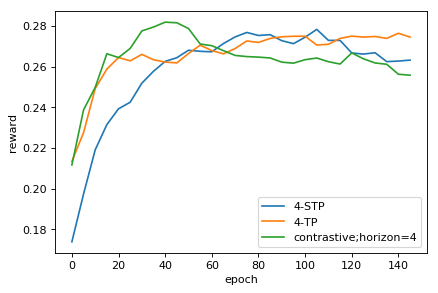

In [28]:
conv = 10
plt.figure(dpi=80)

x = [res[1]['reward'] for res in results_uni]
x = np.convolve(x, np.ones(conv)/conv, mode='valid')
plt.plot(np.arange(len(x))*5, x, label='4-STP')

xy = [res[1]['reward'] for res in results_traj]
xy = np.convolve(xy, np.ones(conv)/conv, mode='valid')
plt.plot(np.arange(len(xy))*5, xy, label='4-TP')

xy = [res[1]['reward'] for res in resutls_cont]
xy = np.convolve(xy, np.ones(conv)/conv, mode='valid')
plt.plot(np.arange(len(xy))*5, xy, label='contrastive;horizon=4')

plt.xlabel('epoch')
plt.ylabel('reward')
plt.legend()
plt.show()

In [11]:
results_uni

[(4,
  {'success': 0.39,
   'collision': 0.61,
   'nav time': 10.275641025641026,
   'reward': 0.03133894616902049}),
 (9,
  {'success': 0.45,
   'collision': 0.55,
   'nav time': 10.372222222222222,
   'reward': 0.06396531052737617}),
 (14,
  {'success': 0.54,
   'collision': 0.46,
   'nav time': 10.060185185185185,
   'reward': 0.1088463383500909}),
 (19,
  {'success': 0.7,
   'collision': 0.3,
   'nav time': 10.292857142857143,
   'reward': 0.1878602454224637}),
 (24,
  {'success': 0.81,
   'collision': 0.19,
   'nav time': 10.564814814814815,
   'reward': 0.23348573084223342}),
 (29,
  {'success': 0.73,
   'collision': 0.27,
   'nav time': 10.270547945205479,
   'reward': 0.20390179024182944}),
 (34,
  {'success': 0.79,
   'collision': 0.21,
   'nav time': 10.471518987341772,
   'reward': 0.22278113218536327}),
 (39,
  {'success': 0.8,
   'collision': 0.2,
   'nav time': 10.475,
   'reward': 0.2286276968929837}),
 (44,
  {'success': 0.84,
   'collision': 0.16,
   'nav time': 10.497